In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:

file_path = 'train_ML_IOT.csv' 
data = pd.read_csv(file_path)
# Inspect the first few rows and general info
print(data.head())


              DateTime  Junction  Vehicles           ID
0  2015-11-01 00:00:00         1        15  20151101001
1  2015-11-01 01:00:00         1        13  20151101011
2  2015-11-01 02:00:00         1        10  20151101021
3  2015-11-01 03:00:00         1         7  20151101031
4  2015-11-01 04:00:00         1         9  20151101041


In [89]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48120 entries, 0 to 48119
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   DateTime  48120 non-null  object
 1   Junction  48120 non-null  int64 
 2   Vehicles  48120 non-null  int64 
 3   ID        48120 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB
None


In [90]:
data.describe()

,Junction,Vehicles,ID
count,48120.000000,48120.000000,4.812000e+04
mean,2.180549,22.791334,2.016330e+10
std,0.966955,20.750063,5.944854e+06
min,1.000000,1.000000,2.015110e+10
25%,1.000000,9.000000,2.016042e+10
50%,2.000000,15.000000,2.016093e+10
75%,3.000000,29.000000,2.017023e+10
max,4.000000,180.000000,2.017063e+10


In [91]:
# Check for any missing values
print(data.isnull().sum())


DateTime    0
Junction    0
Vehicles    0
ID          0
dtype: int64


In [92]:
#check for duplicated values 
print(data.duplicated().sum())

0


In [93]:
#check for unique values in each column

for column in data.columns:
    unique_values = data[column].unique()
    unique_count = data[column].nunique()
    print(f"Column '{column}':")
    print(f"  Unique values count: {unique_count}")
    print(f"  Sample of unique values: {unique_values[:10]}")  # Show a sample of the first 10 unique values
    print("\n")

Column 'DateTime':
  Unique values count: 14592
  Sample of unique values: ['2015-11-01 00:00:00' '2015-11-01 01:00:00' '2015-11-01 02:00:00'
 '2015-11-01 03:00:00' '2015-11-01 04:00:00' '2015-11-01 05:00:00'
 '2015-11-01 06:00:00' '2015-11-01 07:00:00' '2015-11-01 08:00:00'
 '2015-11-01 09:00:00']


Column 'Junction':
  Unique values count: 4
  Sample of unique values: [1 2 3 4]


Column 'Vehicles':
  Unique values count: 141
  Sample of unique values: [15 13 10  7  9  6  8 11 12 17]


Column 'ID':
  Unique values count: 48120
  Sample of unique values: [20151101001 20151101011 20151101021 20151101031 20151101041 20151101051
 20151101061 20151101071 20151101081 20151101091]




In [94]:
#show minimum and maximum values in each column
print(data.describe())

           Junction      Vehicles            ID
count  48120.000000  48120.000000  4.812000e+04
mean       2.180549     22.791334  2.016330e+10
std        0.966955     20.750063  5.944854e+06
min        1.000000      1.000000  2.015110e+10
25%        1.000000      9.000000  2.016042e+10
50%        2.000000     15.000000  2.016093e+10
75%        3.000000     29.000000  2.017023e+10
max        4.000000    180.000000  2.017063e+10


In [95]:
#split datetime into year month and week and day and hour
data['DateTime'] = pd.to_datetime(data['DateTime'])
data['Year'] = data['DateTime'].dt.year
data['Month'] = data['DateTime'].dt.month
data['Week'] = data['DateTime'].dt.weekday
data['Day'] = data['DateTime'].dt.day
data['Hour'] = data['DateTime'].dt.hour
#print the first few rows of the new data
print(data.head())


             DateTime  Junction  Vehicles           ID  Year  Month  Week  \
0 2015-11-01 00:00:00         1        15  20151101001  2015     11     6   
1 2015-11-01 01:00:00         1        13  20151101011  2015     11     6   
2 2015-11-01 02:00:00         1        10  20151101021  2015     11     6   
3 2015-11-01 03:00:00         1         7  20151101031  2015     11     6   
4 2015-11-01 04:00:00         1         9  20151101041  2015     11     6   

   Day  Hour  
0    1     0  
1    1     1  
2    1     2  
3    1     3  
4    1     4  


In [96]:
data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Day,Hour
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,6,1,0
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,6,1,1
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,6,1,2
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,6,1,3
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,6,1,4


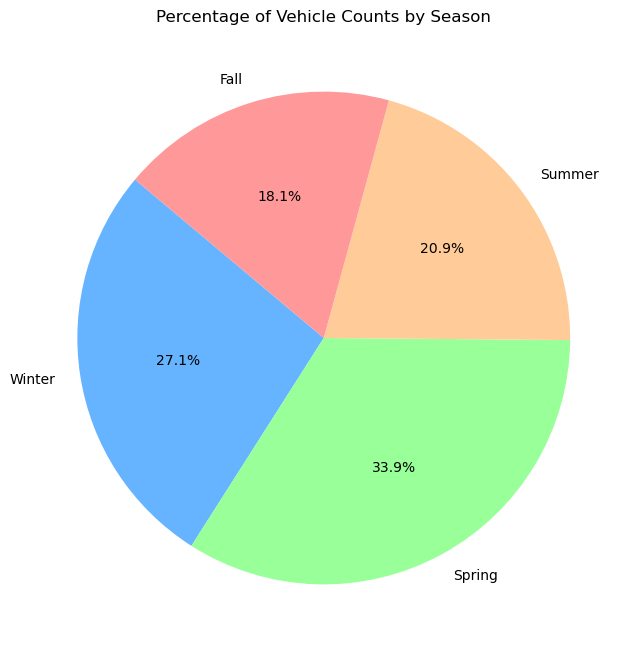

In [97]:


# Define a function to map each month to a season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'

# Create a 'Season' column
data['Season'] = data['DateTime'].dt.month.apply(get_season)

# Aggregate the total number of vehicles by season
seasonal_totals = data.groupby('Season')['Vehicles'].sum().reindex(['Winter', 'Spring', 'Summer', 'Fall'])

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(seasonal_totals, labels=seasonal_totals.index, autopct='%1.1f%%', startangle=140, colors=['#66b3ff','#99ff99','#ffcc99','#ff9999'])
plt.title("Percentage of Vehicle Counts by Season")
plt.show()


In [98]:
data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Day,Hour,Season
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,6,1,0,Fall
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,6,1,1,Fall
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,6,1,2,Fall
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,6,1,3,Fall
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,6,1,4,Fall


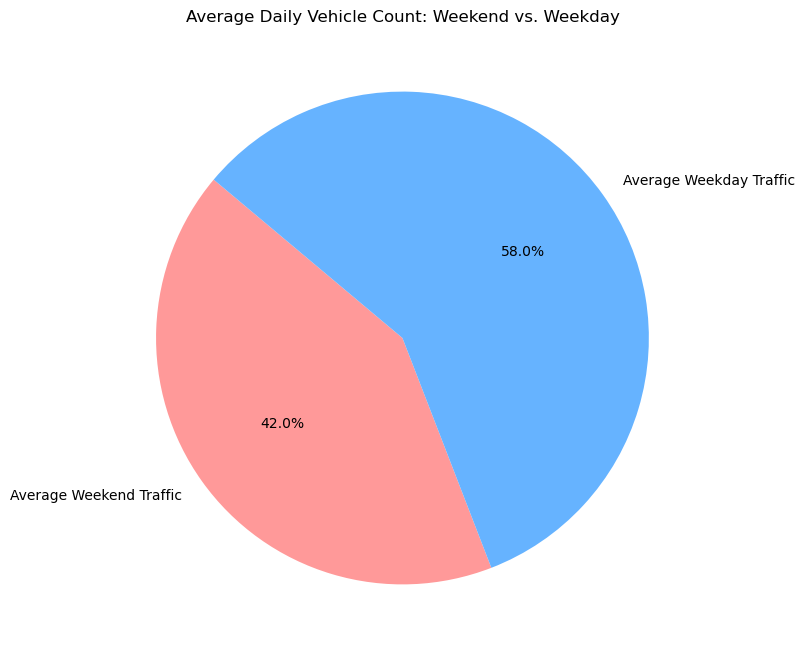

In [99]:
# Identify weekends (Saturday=5, Sunday=6)
data['DayOfWeek'] = data['DateTime'].dt.dayofweek
data['IsWeekend'] = data['DayOfWeek'].isin([5, 6])

# Calculate average daily vehicle count for weekends and weekdays
weekday_avg = data[~data['IsWeekend']].groupby(data['DateTime'].dt.date)['Vehicles'].mean().mean()
weekend_avg = data[data['IsWeekend']].groupby(data['DateTime'].dt.date)['Vehicles'].mean().mean()

# Prepare data for pie chart
labels = ['Average Weekend Traffic', 'Average Weekday Traffic']
sizes = [weekend_avg, weekday_avg]
colors = ['#ff9999', '#66b3ff']

# Plot the pie chart
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title("Average Daily Vehicle Count: Weekend vs. Weekday")
plt.show()


In [100]:
data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Day,Hour,Season,DayOfWeek,IsWeekend
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,6,1,0,Fall,6,True
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,6,1,1,Fall,6,True
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,6,1,2,Fall,6,True
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,6,1,3,Fall,6,True
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,6,1,4,Fall,6,True


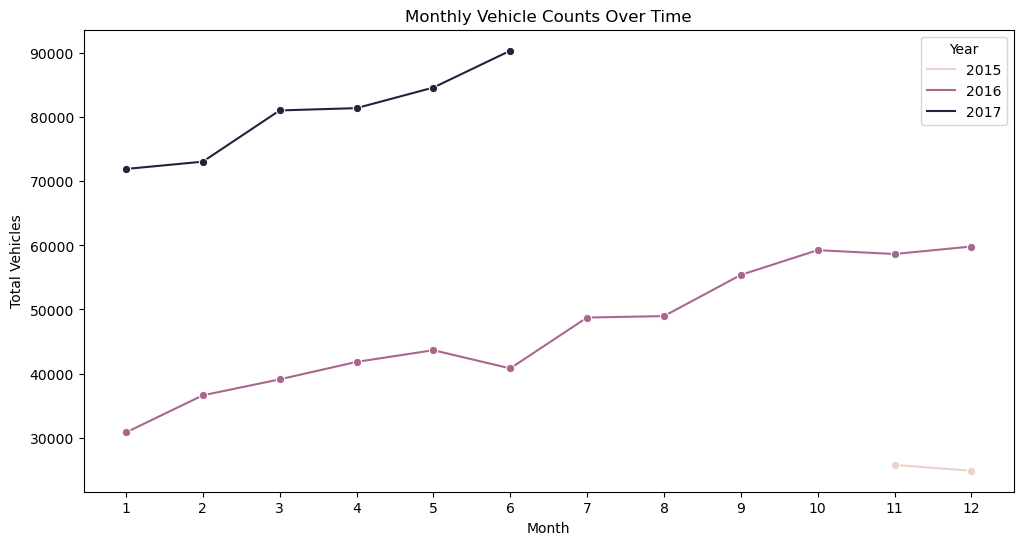

In [101]:
monthly_vehicle_counts = data.groupby(['Year', 'Month'])['Vehicles'].sum().reset_index()
plt.figure(figsize=(12, 6))
sns.lineplot(data=monthly_vehicle_counts, x="Month", y="Vehicles", hue="Year", marker="o")
plt.title("Monthly Vehicle Counts Over Time")
plt.xlabel("Month")
plt.ylabel("Total Vehicles")
plt.legend(title="Year")
plt.xticks(range(1, 13))
plt.show()

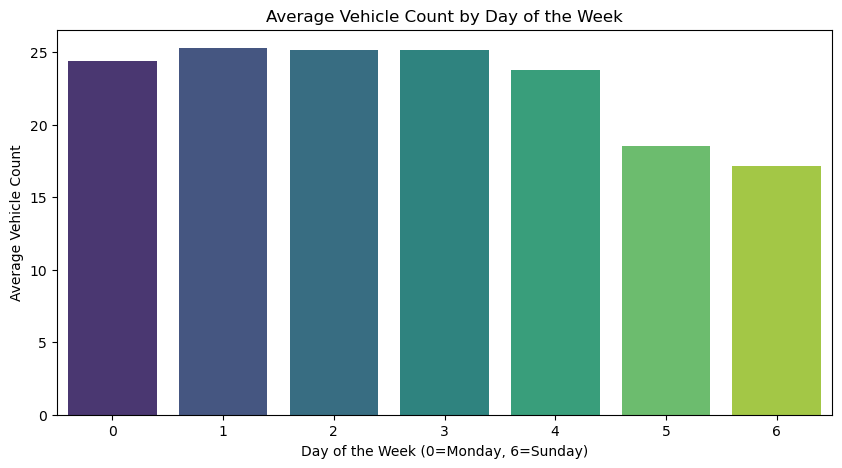

In [102]:
weekday_vehicle_counts = data.groupby('DayOfWeek')['Vehicles'].mean().reset_index()
plt.figure(figsize=(10, 5))
sns.barplot(data=weekday_vehicle_counts, x="DayOfWeek", y="Vehicles", palette="viridis")
plt.title("Average Vehicle Count by Day of the Week")
plt.xlabel("Day of the Week (0=Monday, 6=Sunday)")
plt.ylabel("Average Vehicle Count")
plt.show()

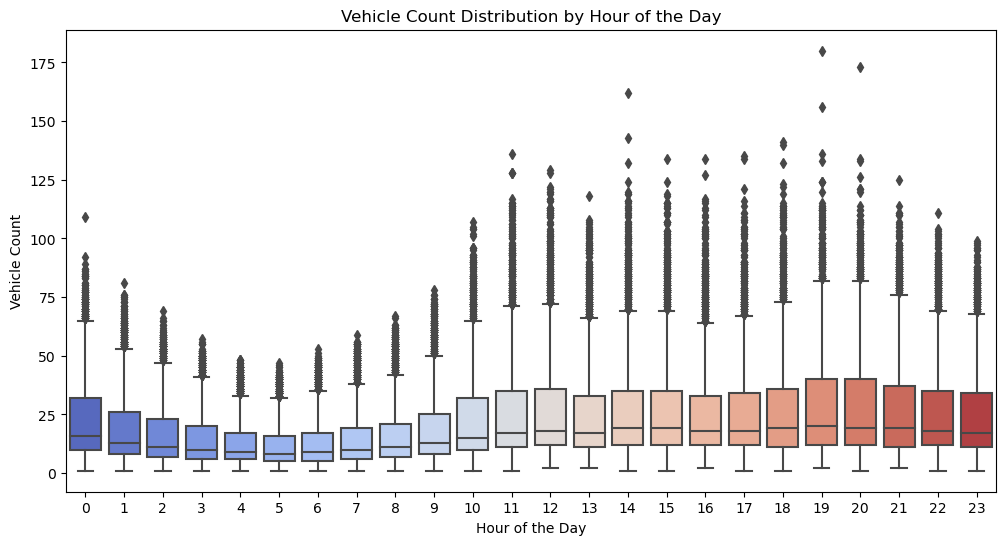

In [103]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Hour", y="Vehicles", palette="coolwarm")
plt.title("Vehicle Count Distribution by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Vehicle Count")
plt.show()

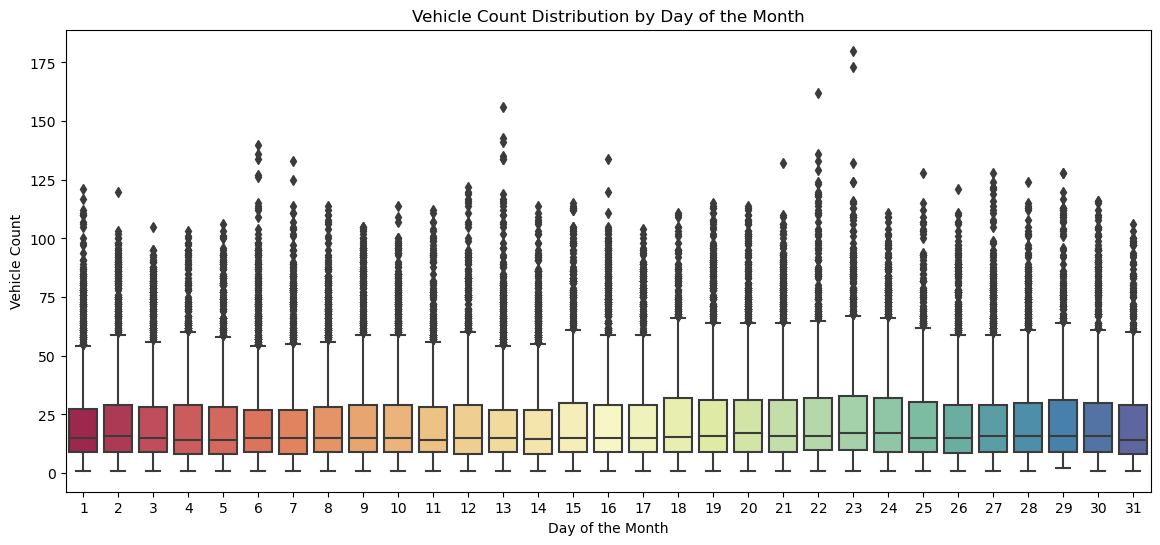

In [104]:
plt.figure(figsize=(14, 6))
sns.boxplot(data=data, x="Day", y="Vehicles", palette="Spectral")
plt.title("Vehicle Count Distribution by Day of the Month")
plt.xlabel("Day of the Month")
plt.ylabel("Vehicle Count")
plt.show()

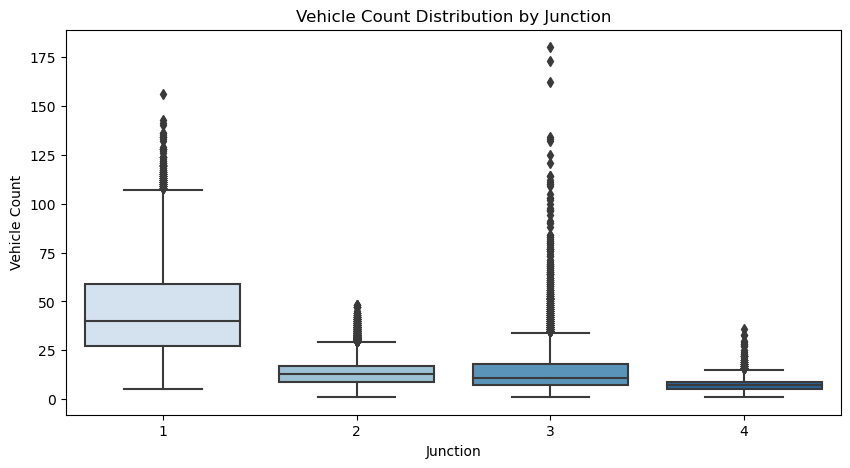

In [105]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Junction", y="Vehicles", palette="Blues")
plt.title("Vehicle Count Distribution by Junction")
plt.xlabel("Junction")
plt.ylabel("Vehicle Count")
plt.show()

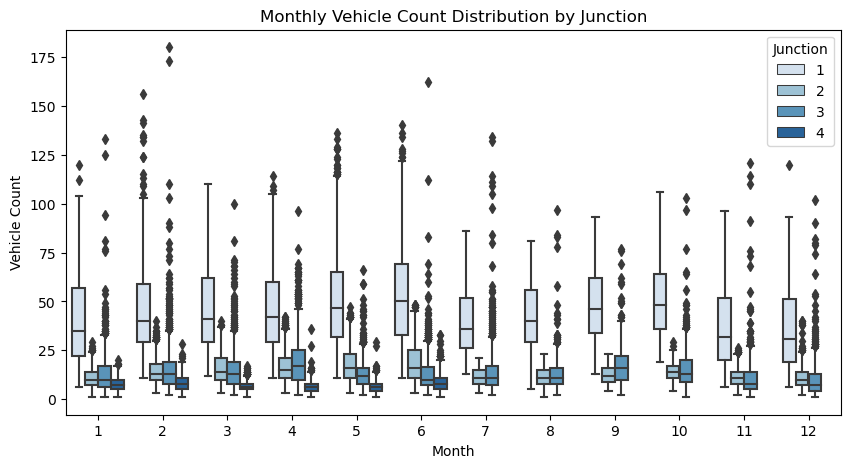

In [106]:
data['Month'] = data['Month'].astype(int)

plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x="Month", y="Vehicles", hue="Junction", palette="Blues")
plt.title("Monthly Vehicle Count Distribution by Junction")
plt.xlabel("Month")
plt.ylabel("Vehicle Count")
plt.legend(title="Junction", loc="upper right")
plt.show()


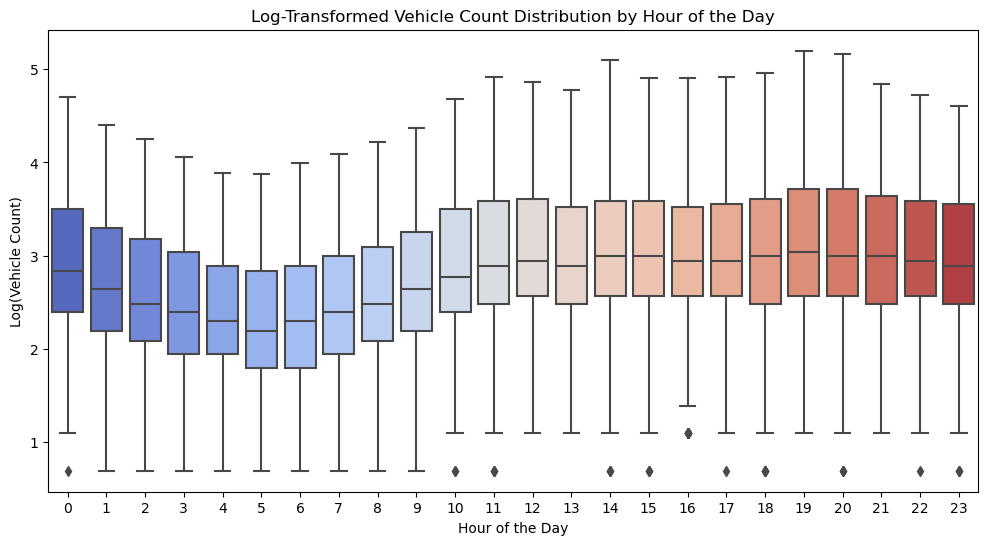

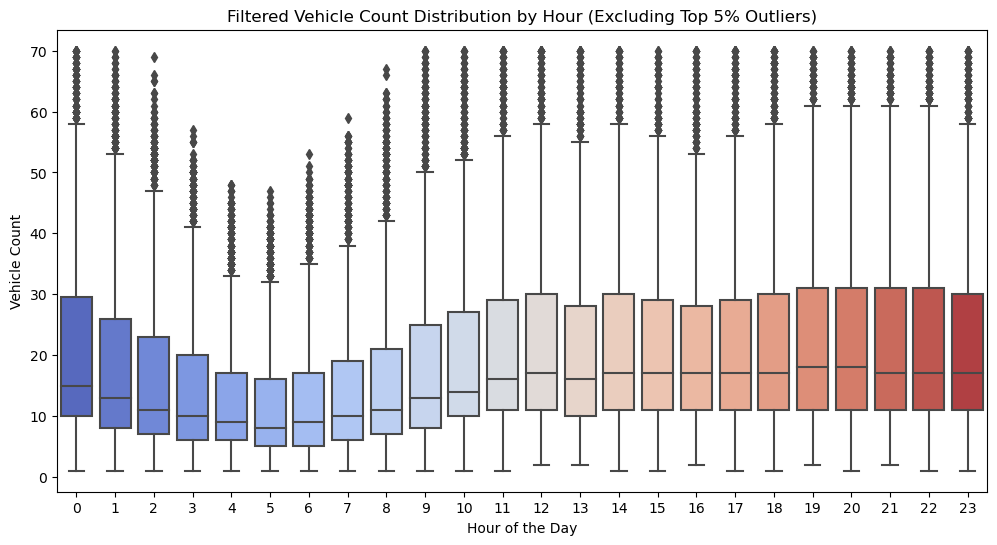

In [107]:
#Using a log transformation for the "Vehicles" variable
import numpy as np

# Apply log transformation
data['LogVehicles'] = np.log1p(data['Vehicles'])

plt.figure(figsize=(12, 6))
sns.boxplot(data=data, x="Hour", y="LogVehicles", palette="coolwarm")
plt.title("Log-Transformed Vehicle Count Distribution by Hour of the Day")
plt.xlabel("Hour of the Day")
plt.ylabel("Log(Vehicle Count)")
plt.show()

# Example 2: Filter data to exclude the top 5% as outliers
upper_threshold = data['Vehicles'].quantile(0.95)
filtered_data = data[data['Vehicles'] <= upper_threshold]

plt.figure(figsize=(12, 6))
sns.boxplot(data=filtered_data, x="Hour", y="Vehicles", palette="coolwarm")
plt.title("Filtered Vehicle Count Distribution by Hour (Excluding Top 5% Outliers)")
plt.xlabel("Hour of the Day")
plt.ylabel("Vehicle Count")
plt.show()


In [108]:
data.head()

,DateTime,Junction,Vehicles,ID,Year,Month,Week,Day,Hour,Season,DayOfWeek,IsWeekend,LogVehicles
0,2015-11-01 00:00:00,1,15,20151101001,2015,11,6,1,0,Fall,6,True,2.772589
1,2015-11-01 01:00:00,1,13,20151101011,2015,11,6,1,1,Fall,6,True,2.639057
2,2015-11-01 02:00:00,1,10,20151101021,2015,11,6,1,2,Fall,6,True,2.397895
3,2015-11-01 03:00:00,1,7,20151101031,2015,11,6,1,3,Fall,6,True,2.079442
4,2015-11-01 04:00:00,1,9,20151101041,2015,11,6,1,4,Fall,6,True,2.302585
